In [2]:
import numpy as np

In [3]:
fileName = "fs_0.1_1.0_10_256_128_1_0.4496_1.0612"
snap = np.load("{}.npy".format(fileName))

# Read from fileName
om = float(fileName.split("_")[7])
L = int(fileName.split("_")[4])  # Mpc/h
N = int(fileName.split("_")[5])

rho_crit = 1.8784723e-26  # h^2 kg m^-3
h = 0.6774
Mpc = 3.0857e22  # m
# G = 6.6743015e-11  # N m^2 kg^-2
# rho_crit = 3*(h*100*1000/Mpc)**2/(8*np.pi*G)
Ms = 1.9884e30  # kg

particle_position_x = snap[0, 0, :, 0]/N*L/h  # Mpc
particle_position_y = snap[0, 0, :, 1]/N*L/h
particle_position_z = snap[0, 0, :, 2]/N*L/h
particle_velocity_x = snap[1, 0, :, 0]/N*L/h  # Mpc s^-1
particle_velocity_y = snap[1, 0, :, 1]/N*L/h
particle_velocity_z = snap[1, 0, :, 2]/N*L/h
particle_mass = np.array([om*rho_crit*(L**3)*(Mpc**3)/(N**3)/h/Ms]*(N**3))  # Ms

In [4]:
snap_ASCII = [particle_position_x, particle_position_y, particle_position_z, particle_velocity_x, particle_velocity_y, particle_velocity_z, np.arange(particle_position_x.shape[0])]
snap_ASCII = np.array(snap_ASCII).T
snap_ASCII.shape

(2097152, 7)

In [8]:
# np.save("{}_ASCII".format(fileName), snap_ASCII)
np.savetxt("{}.ascii".format(fileName), snap_ASCII)

In [9]:
print(particle_mass[0]*h)
print(om)

998339907629.688
0.4496


In [10]:
halos = np.genfromtxt("halos_0.0.ascii")

In [11]:
halos = halos[:, [4,8,9,10]]
print(halos.shape)

(2587, 4)


In [12]:
print(halos)

[[ 3.21143463e+02 -1.60562300e+00  1.72396500e+00  3.77344440e+01]
 [ 4.29968018e+02 -2.24079000e+00  3.94352900e+00  7.27801060e+01]
 [ 4.73241058e+02  1.27359000e-01  6.11169500e+00  7.15488280e+01]
 ...
 [ 3.41265839e+02  3.76836487e+02  3.41052185e+02  3.75481079e+02]
 [ 2.36620529e+02  3.86107910e+02  3.44997864e+02  3.66259277e+02]
 [ 4.92190521e+02  3.84977905e+02  3.46094574e+02  3.67623840e+02]]


In [13]:
import matplotlib.pyplot as plt

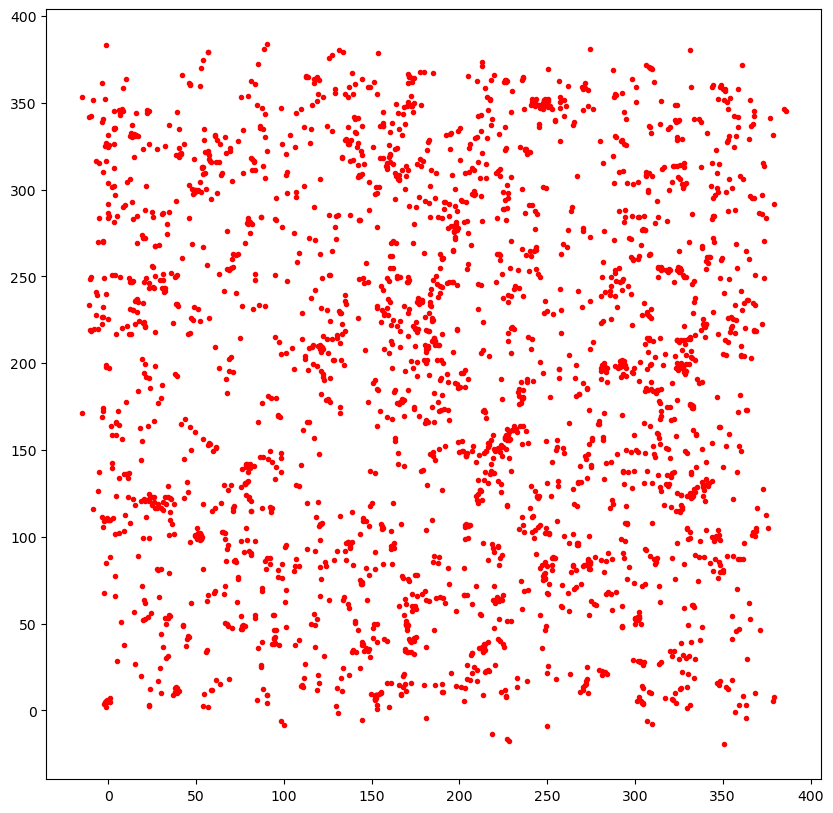

In [14]:
fig=plt.figure(figsize=(10,10))#Create 3D axes
ax=fig.add_subplot(111)
# ax.scatter(particle_position_x, particle_position_y, particle_position_z,color="royalblue",marker=".",s=.02)
ax.scatter(halos[:, 1], halos[:, 2],color="red",marker=".",s=35)
# ax.set_xlabel("x-coordinate",fontsize=14)
# ax.set_ylabel("y-coordinate",fontsize=14)
# ax.set_zlabel("z-coordinate",fontsize=14)
# ax.set_title("Large Scale Structures\n",fontsize=20)
# ax.legend(loc="upper left",fontsize=14)
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])
# plt.savefig('3dfinal.png', dpi=1200)
# ax.view_init(elev=90, azim=0)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


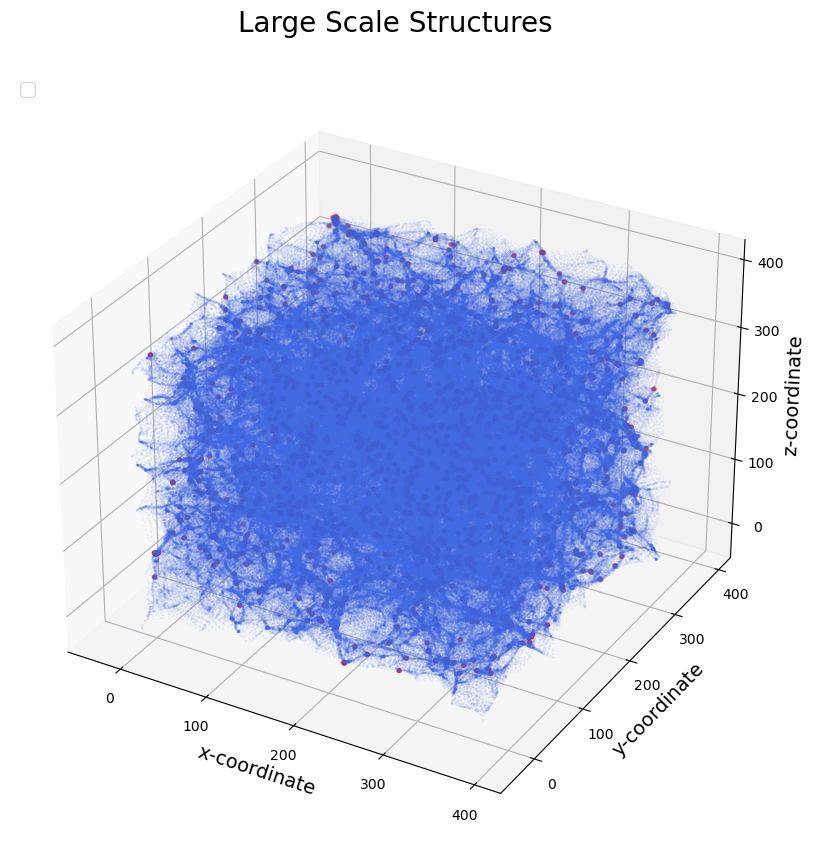

In [26]:
fig=plt.figure(figsize=(10,10))#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
ax.scatter(particle_position_x, particle_position_y, particle_position_z,color="royalblue",marker=".",s=.02)
ax.scatter(halos[:, 1], halos[:, 2], halos[:, 3],color="red",marker=".",s=35)
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Large Scale Structures\n",fontsize=20)
ax.legend(loc="upper left",fontsize=14)
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])
# plt.savefig('3dfinal.png', dpi=1200)
# ax.view_init(elev=90, azim=0)
plt.show()